# Multiple protein spheres attached on GNP. 

In [116]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#%matplotlib notebook

In [120]:
#speed up loop using numba
from numba import jit
from numba import njit
from numba import prange

## Functions to plot 3d spheres

In [377]:
def add_sphere(ax, radius, x0, y0, z0, c='r', alpha=0.8):
    phi = np.linspace(0, np.pi, 40)
    theta = np.linspace(0, 2*np.pi, 40)
    phi, theta = np.meshgrid(phi, theta)

    # The Cartesian coordinates of the unit sphere
    x = x0+radius*np.sin(phi) * np.cos(theta)
    y = y0+radius*np.sin(phi) * np.sin(theta)
    z = z0+radius*np.cos(phi)
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, color=c, alpha=alpha)

protein sphere radius=5nm, diameter=10nm

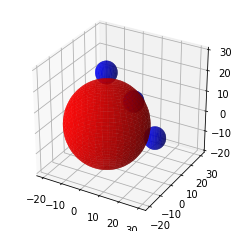

In [364]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
radius=40/2
add_sphere(ax, radius, 0,0,0)
radius=10/2
add_sphere(ax, radius, 0,0,25,c='b')
radius=10/2
add_sphere(ax, radius, 25,0,0,c='b')
radius=10/2
add_sphere(ax, radius, 0,25,0,c='b')
# Turn off the axis planes

#ax.set_axis_off()
plt.show()

## Monte Carlo methods to generate non-overlapping sphere

In [378]:
def dis(v1, v2):
    return np.sqrt((v1-v2).dot(v1-v2))

#@jit
def add_protein(x0,y0,z0, r1, r2, distance, n, overlap=False, ntry=1000):
    '''
    radius of GNP:r1
    radius of protein: r2
    distance between centers: distance
    number of protein spheres: np
    Can protein spheres overlap: overlap
    '''
    posv=[]
    n1=0
    for i in prange(ntry):
        phi = np.random.rand()*np.pi*2
        theta = np.random.rand()*np.pi
        #phi, theta = np.meshgrid(phi, theta)
        radius=distance
        x = x0+radius*np.sin(phi) * np.cos(theta)
        y = y0+radius*np.sin(phi) * np.sin(theta)
        z = z0+radius*np.cos(phi)
        flag=True
        #if no overlap
        if(overlap==False):
            if(len(posv)>1):
                for j in prange(len(posv)):
                    d1=dis(np.array([x,y,z]), np.array([posv[j][0],posv[j][1],posv[j][2]]))
                    if(d1<2*r2):
                        flag=False
                        break
        if(flag):
            n1+=1
            posv.append([x,y,z])
        if(n1==n):
            break
    
    return np.array(posv)


def plot_spheres(ax, radius, posv):
    for i in range(len(posv)):
        add_sphere(ax, radius, posv[i,0],posv[i,1],posv[i,2],c='b')
    # Turn off the axis planes
    #ax.set_axis_off()

### spheres can overlap

20


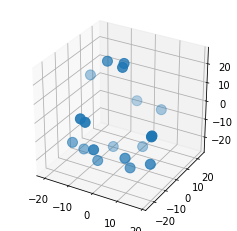

In [365]:
r1=20
r2=5
distance=r1+r2
x0,y0,z0=0,0,0
n=20
posv=add_protein(x0,y0,z0, r1, r2, distance, n, overlap=True, ntry=10000)
print(len(posv))
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(posv[:,0],posv[:,1],posv[:,2],s=100)

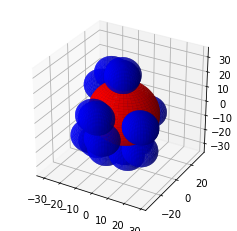

In [366]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
radius=40/2
add_sphere(ax, radius, 0,0,0, alpha=1)
radius=5
plot_spheres(ax, radius, posv)

plt.show()

### spheres not overlapping

20


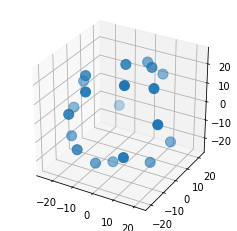

In [367]:
r1=20
r2=5
distance=r1+r2
x0,y0,z0=0,0,0
n=20
posv=add_protein(x0,y0,z0, r1, r2, distance, n, overlap=False, ntry=10000)
print(len(posv))
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(posv[:,0],posv[:,1],posv[:,2],s=100)

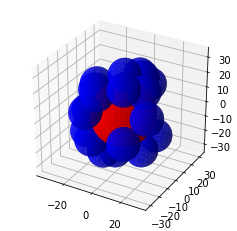

In [368]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
radius=20
add_sphere(ax, radius, 0,0,0, alpha=1)
radius=5
plot_spheres(ax, radius, posv)

plt.show()

### generating a lots of spheres is difficult

20


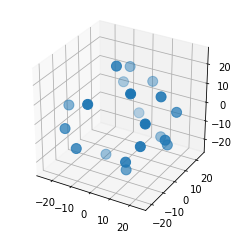

In [369]:
r1=20
r2=5
distance=r1+r2
x0,y0,z0=0,0,0
n=20
posv=add_protein(x0,y0,z0, r1, r2, distance, n, overlap=False, ntry=10000)
print(len(posv))
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(posv[:,0],posv[:,1],posv[:,2],s=100)

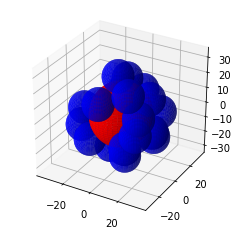

In [370]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
radius=20
add_sphere(ax, radius, 0,0,0, alpha=1)
radius=5
plot_spheres(ax, radius, posv)

plt.show()

## Grids methods

Above methods using random positions are not efficient. Since each sphere occupy a specific range of solid angle, we should be able to discrete the whole 4pi solid angle into discrete grids with a finite size, then it is only a matter of selection of number of grids. This need future work to do if necessasry. 

## Create scripts generating both positions and refractive index

In [374]:
r1=20 #GNP radius
r2=5 #protein sphere radius
distance=r1+r2 #touch 
x0,y0,z0=0,0,0 #center of GNP
n=50
posv=add_protein(x0,y0,z0, r1, r2, distance, n, overlap=False, ntry=50000)
len(posv)

50

50


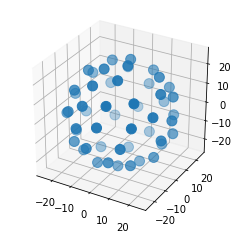

In [375]:
print(len(posv))
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(posv[:,0],posv[:,1],posv[:,2],s=100)

In [376]:
r1,r2

(20, 5)

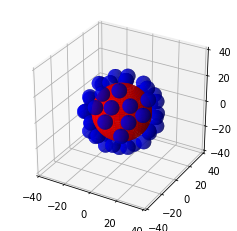

In [379]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
radius=r1
add_sphere(ax, radius, 0,0,0, alpha=1)
radius=r2
plot_spheres(ax, radius, posv)
ax.set_xlim3d(-40, 40)
ax.set_ylim3d(-40, 40)
ax.set_zlim3d(-40, 40)
plt.savefig("/Users/mgao1/Desktop/t07_p50.png",dpi=300)

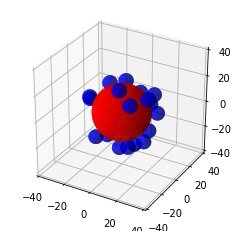

In [381]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
radius=r1
add_sphere(ax, radius, 0,0,0, alpha=1)
radius=r2
plot_spheres(ax, radius, posv[0:20])
ax.set_xlim3d(-40, 40)
ax.set_ylim3d(-40, 40)
ax.set_zlim3d(-40, 40)
plt.savefig("/Users/mgao1/Desktop/t07_p20.png",dpi=300)

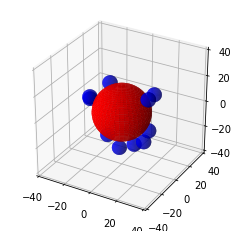

In [382]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
radius=r1
add_sphere(ax, radius, 0,0,0, alpha=1)
radius=r2
plot_spheres(ax, radius, posv[0:10])
ax.set_xlim3d(-40, 40)
ax.set_ylim3d(-40, 40)
ax.set_zlim3d(-40, 40)
plt.savefig("/Users/mgao1/Desktop/t07_p10.png",dpi=300)

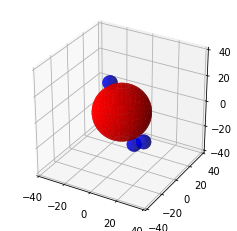

In [383]:
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
radius=r1
add_sphere(ax, radius, 0,0,0, alpha=1)
radius=r2
plot_spheres(ax, radius, posv[0:3])
ax.set_xlim3d(-40, 40)
ax.set_ylim3d(-40, 40)
ax.set_zlim3d(-40, 40)
plt.savefig("/Users/mgao1/Desktop/t07_p3.png",dpi=300)

In [395]:
posv2=np.zeros((len(posv)+1,4))
posv2.shape
posv2[0,0]=r1
posv2[1:,0]=r2
posv2[1:,1:]=posv

import pickle
pickle.dump(posv2,open("./posv50_t1.pkl",'wb'))
print(posv2.shape)

(51, 4)


In [385]:
import pickle
#read data of wavelength, n, k, x1, xn, xd
[nv2, kv2, wv2, dv2, nkd]=pickle.load(open("../data/gold_nk.pkl", "rb" ))
nkd.shape

(50, 6)

In [393]:
posv2.shape

(51, 4)

In [396]:
##this script will be copy to the server for generating MSTM scripts 
import shutil
#base file will the created with basic paratmers for MSTM
src_file='../data/base2p.inp'
post=pickle.load(open("./posv50_t1.pkl","rb"))
post.shape

nsphere=len(post)
#add parameters for refractive index and size
for iwv in range(len(wv2)):
    for isphere in range(1,nsphere+1):
        #print(iwv, nkd[iwv,0], nkd[iwv,1])

        new_file='test_w'+str(iwv)+'_is'+str(isphere)+'.inp'
        #print("copy to new file:", new_file)
        shutil.copy(src_file,new_file)

        f1 = open(new_file, 'a')
        f1.write("output_file\n")
        f1.write("outw"+str(iwv)+'_is'+str(isphere)+".dat\n")
        f1.write("real_ref_index_scale_factor\n")
        f1.write("%5.5f\n"% 1)
        f1.write("imag_ref_index_scale_factor\n")
        f1.write("%5.5f\n"% 1)
        f1.write("number_spheres\n")
        f1.write(str(isphere)+"\n")
        f1.write("length_scale_factor\n")
        scale1=2.0*np.pi/wv2[iwv]
        f1.write("%5.5f\n" % scale1)
        f1.write("sphere_sizes_and_positions\n")
        #f1.write("%5.5f %5.5f %5.5f %5.5f %5.5f %5.5f\n"% (dv2[idv]/2, 0.0, 0.0, dv2[idv]/2, nkd[iwv,1], nkd[iwv,2]))
        #f1.write("%5.5f %5.5f %5.5f %5.5f %5.5f %5.5f\n"% (10.0/2, 0.0, 0.0, -10.0/2, 1.45, 0))
        #add extra size to the last size to ensure it is included
        for j in range(isphere):
            if(j==0):
                f1.write("%5.5f %5.5f %5.5f %5.5f %5.5f %5.5f\n"% (post[j,0], post[j,1], post[j,2], post[j,3], nkd[iwv,1], nkd[iwv,2]))
            else:
                f1.write("%5.5f %5.5f %5.5f %5.5f %5.5f %5.5f\n"% (post[j,0], post[j,1], post[j,2], post[j,3], 1.45,0.0))
        f1.write('end_of_options')
        f1.close()

In [399]:
len(wv2)*len(post)

2550

## Analyze MSTM results

In [261]:
import pandas as pd

In [452]:
#pd1=pd.read_csv("../data/t07_gnpd40nm_20spheres.summary",delim_whitespace=True) #diamter 40+20
pd1=pd.read_csv("../data/t07_gnpd40nm_50spheres.summary",delim_whitespace=True) #diamter 40+10
pd1=pd1.loc[(pd1['total']!='total')]
#unpolarized total ext, abs, scat efficiencies, w.r.t. xv, and asym. parm
pd1=pd.DataFrame(pd1.values.astype('float')[:,:4],columns=("Qext", "Qabs", "Qsca","Asymmetry"))

nwv=len(nkd)
qextv4=pd1['Qext'].values.reshape(nwv, -1)
qscav4=pd1['Qsca'].values.reshape(nwv, -1)
qabsv4=pd1['Qabs'].values.reshape(nwv, -1)
gv4=pd1['Asymmetry'].values.reshape(nwv, -1)

In [438]:
def plot_q(ax, qextv,  wv, dv, yscale='linear',xlabel="Wavelength(nm)", ylabel=''):
    nd=len(dv)
    nwv=len(wv)
    num_plots=len(dv)
    colormap = plt.cm.gist_ncar
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    ax.set_yscale(yscale)
    for j in range(nd):
        tmp=plt.plot(wv,qextv[:,j], label=dv[j])
    plt.legend(title="Total #Spheres")
    plt.title("One GNP(Diameter:40nm)+Multiple protein spheres(Diamter:10nm)")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

In [436]:
qextv4.shape

(50, 51)

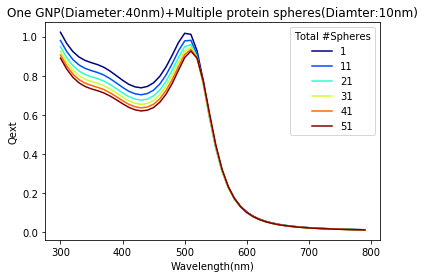

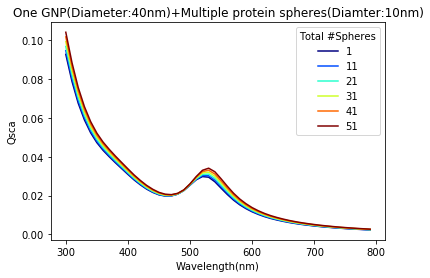

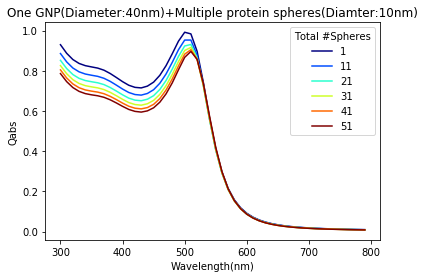

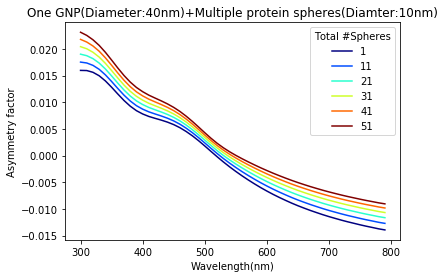

In [453]:

nt=10
sv=range(1,52,nt)

plt.figure()
ax=plt.subplot(111)
qv=qextv4
plot_q(ax, qv[:,::nt],  wv2, sv,ylabel='Qext')
#plt.plot(wv2,qextv2[:,3],'g.')
#plt.plot(wv2,qextv3[:,3],'g--')
plt.savefig("/Users/mgao1/Desktop/t07_qext_spheres.png",dpi=300)

plt.figure()
ax=plt.subplot(111)
qv=qscav4
plot_q(ax, qv[:,::nt],  wv2, sv,ylabel='Qsca')
#plt.plot(wv2,qextv2[:,3],'g.')
#plt.plot(wv2,qextv3[:,3],'g--')
plt.savefig("/Users/mgao1/Desktop/t07_qsca_spheres.png",dpi=300)

plt.figure()
ax=plt.subplot(111)
qv=qabsv4
plot_q(ax, qv[:,::nt],  wv2, sv,ylabel='Qabs')
#plt.plot(wv2,qextv2[:,3],'g.')
#plt.plot(wv2,qextv3[:,3],'g--')
plt.savefig("/Users/mgao1/Desktop/t07_qabs_spheres.png",dpi=300)

plt.figure()
ax=plt.subplot(111)
qv=gv4
plot_q(ax, qv[:,::nt],  wv2, sv,ylabel='Asymmetry factor')
#plt.plot(wv2,qextv2[:,3],'g.')
#plt.plot(wv2,qextv3[:,3],'g--')
plt.savefig("/Users/mgao1/Desktop/t07_gv_spheres.png",dpi=300)

In [411]:
#[qextv2,qscav2, qabsv2, qbackv2,gv2]
datag1=pickle.load(open("../data/mie_gnp_coated0.pkl","rb"))
datag2=pickle.load(open("../data/mie_gnp_coated10.pkl","rb"))
datag3=pickle.load(open("../data/mie_gnp_coated20.pkl","rb"))

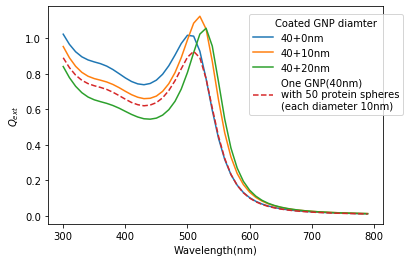

In [442]:
plt.plot(wv2,datag1[0][:,3],label='40+0nm')
plt.plot(wv2,datag2[0][:,3],label='40+10nm')
plt.plot(wv2,datag3[0][:,3],label='40+20nm')
plt.plot(wv2,qextv[:,-1],'--',label='One GNP(40nm) \nwith 50 protein spheres\n(each diameter 10nm)')
plt.legend(loc=(0.6,0.5),title='Coated GNP diamter')
plt.xlabel("Wavelength(nm)")
plt.ylabel("$Q_{ext}$")
plt.savefig("/Users/mgao1/Desktop/t07_qext_coated.png",dpi=300)